🚀 Training models...
✅ Models trained successfully!

🔥 Combined Feature Importance (XGBoost | SVM | NN):

                    Feature  Importance_XGB  Importance_SVM  Importance_NN
0                   Glucose        0.281027        0.080195   9.188312e-02
1                       BMI        0.133590        0.022403  -1.948052e-03
2                       Age        0.116758        0.025000  -1.396104e-02
3               Pregnancies        0.104679        0.012013   1.110223e-17
4                   Insulin        0.098007        0.004545  -1.493506e-02
5  DiabetesPedigreeFunction        0.093345        0.010065  -2.467532e-02
6             SkinThickness        0.090070       -0.001948  -3.636364e-02
7             BloodPressure        0.082524        0.007143  -1.818182e-02


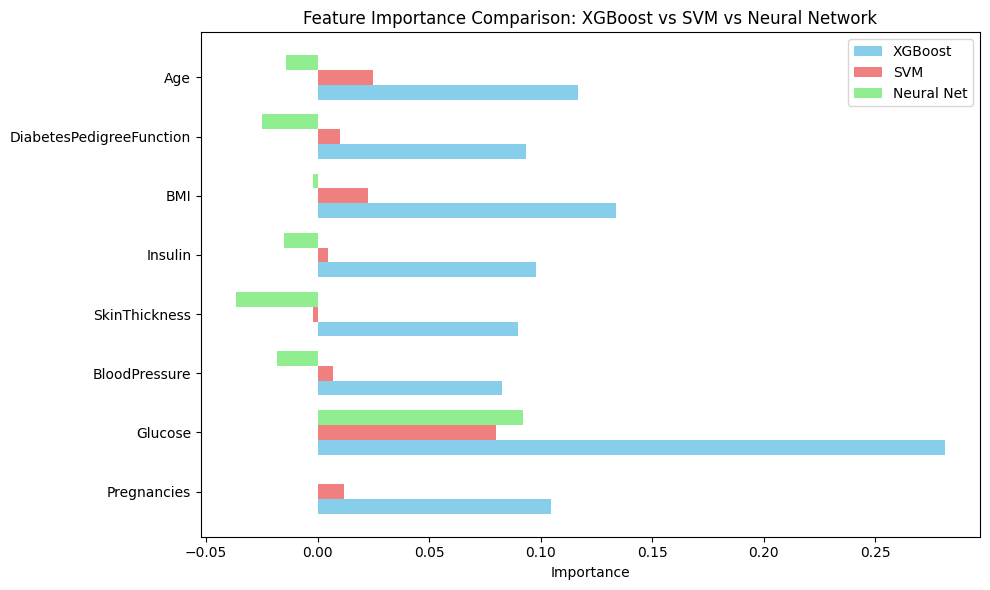

In [2]:
# =============================================
# 🔍 FEATURE IMPORTANCE COMPARISON: SVM, XGBOOST, NN
# =============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# STEP 1: LOAD DATA
# ----------------------------
df = pd.read_csv(r"D:\Manasa College\SE\venv\data\diabetes.csv")  # ensure the file has 8 features + 'Outcome'

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[features]
y = df['Outcome']

# ----------------------------
# STEP 2: SPLIT & SCALE
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# STEP 3: TRAIN MODELS
# ----------------------------
print("🚀 Training models...")

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss',
    n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000,
                         activation='relu', random_state=42)
nn_model.fit(X_train_scaled, y_train)

print("✅ Models trained successfully!\n")

# ----------------------------
# STEP 4: FEATURE IMPORTANCE
# ----------------------------

# --- XGBoost Built-in ---
xgb_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- SVM Permutation Importance ---
svm_perm = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=20, random_state=42)
svm_importance = pd.DataFrame({
    'Feature': features,
    'Importance': svm_perm.importances_mean
}).sort_values(by='Importance', ascending=False)

# --- Neural Network Permutation Importance ---
nn_perm = permutation_importance(nn_model, X_test_scaled, y_test, n_repeats=20, random_state=42)
nn_importance = pd.DataFrame({
    'Feature': features,
    'Importance': nn_perm.importances_mean
}).sort_values(by='Importance', ascending=False)

# ----------------------------
# STEP 5: COMBINE RESULTS
# ----------------------------
combined = xgb_importance.merge(svm_importance, on='Feature', suffixes=('_XGB', '_SVM'))
combined = combined.merge(nn_importance, on='Feature')
combined.rename(columns={'Importance': 'Importance_NN'}, inplace=True)
combined = combined.sort_values(by='Importance_XGB', ascending=False)

print("🔥 Combined Feature Importance (XGBoost | SVM | NN):\n")
print(combined)

# ----------------------------
# STEP 6: VISUALIZE
# ----------------------------
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = np.arange(len(features))

plt.barh(x - 0.25, xgb_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='XGBoost', color='skyblue')
plt.barh(x, svm_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='SVM', color='lightcoral')
plt.barh(x + 0.25, nn_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='Neural Net', color='lightgreen')

plt.yticks(x, features)
plt.xlabel("Importance")
plt.title("Feature Importance Comparison: XGBoost vs SVM vs Neural Network")
plt.legend()
plt.tight_layout()
plt.show()

